# Team Comparision:Visualizations

In [144]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [146]:
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
df.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000


#### 1.Which team has a higher average number of goals scored per game?

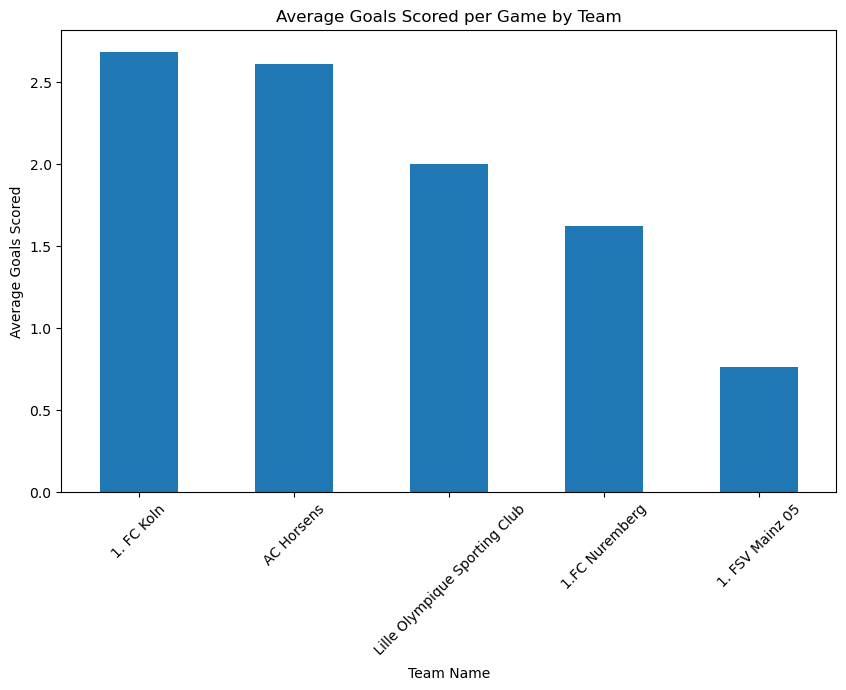

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by home team and calculate average goals scored
team_avg_goals = df.groupby('home_club_name')['home_club_goals'].mean().head(5)

# Sort the teams by average goals scored
team_avg_goals = team_avg_goals.sort_values(ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
team_avg_goals.plot(kind='bar')
plt.xlabel('Team Name')
plt.ylabel('Average Goals Scored')
plt.title('Average Goals Scored per Game by Team')
plt.xticks(rotation=45)
plt.show()

#### Interpretation:FC koln team scored highest number of goals

#### 2: Which team has a better defensive record?

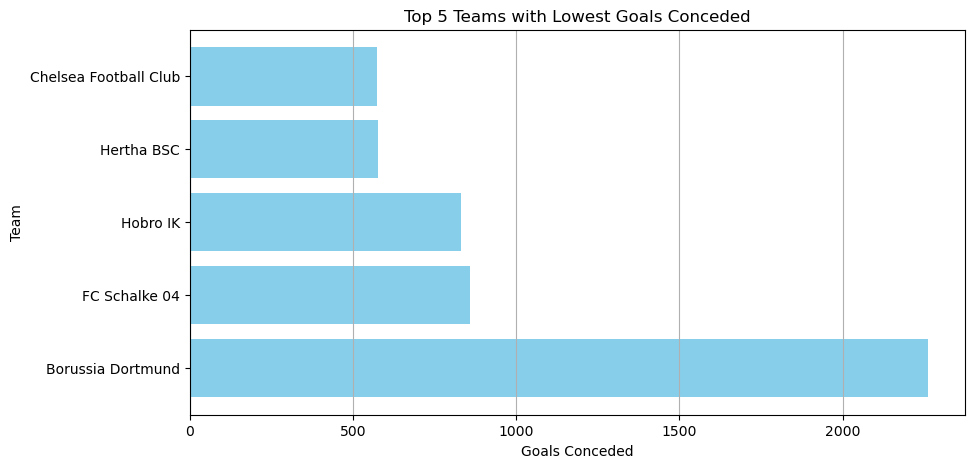

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total goals conceded for each team
# Goals conceded can be calculated as away_club_goals when home_club is playing at home
# and home_club_goals when away_club is playing away.

# Create a new DataFrame for goals conceded
goals_conceded_home = df.groupby('home_club_name')['away_club_goals'].sum().reset_index()
goals_conceded_home.columns = ['Team', 'Goals Conceded']

goals_conceded_away = df.groupby('away_club_name')['home_club_goals'].sum().reset_index()
goals_conceded_away.columns = ['Team', 'Goals Conceded']

# Combine both DataFrames
total_goals_conceded = pd.concat([goals_conceded_home, goals_conceded_away]).groupby('Team')['Goals Conceded'].sum().reset_index()

# Sort by Goals Conceded (ascending=False for descending order)
total_goals_conceded = total_goals_conceded.sort_values(by='Goals Conceded', ascending=False).head(5)

# Select the top 5 teams with the lowest goals conceded
top_5_defensive_teams = total_goals_conceded

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(total_goals_conceded['Team'], total_goals_conceded['Goals Conceded'], color='skyblue')
plt.title('Top 5 Teams with Lowest Goals Conceded')
plt.xlabel('Goals Conceded')
plt.ylabel('Team')
plt.grid(axis='x')
plt.show()

#### Interpretation: Borussia dortmund team has lowest goals conceded

#### 3.What are average goals conceded per game by team?

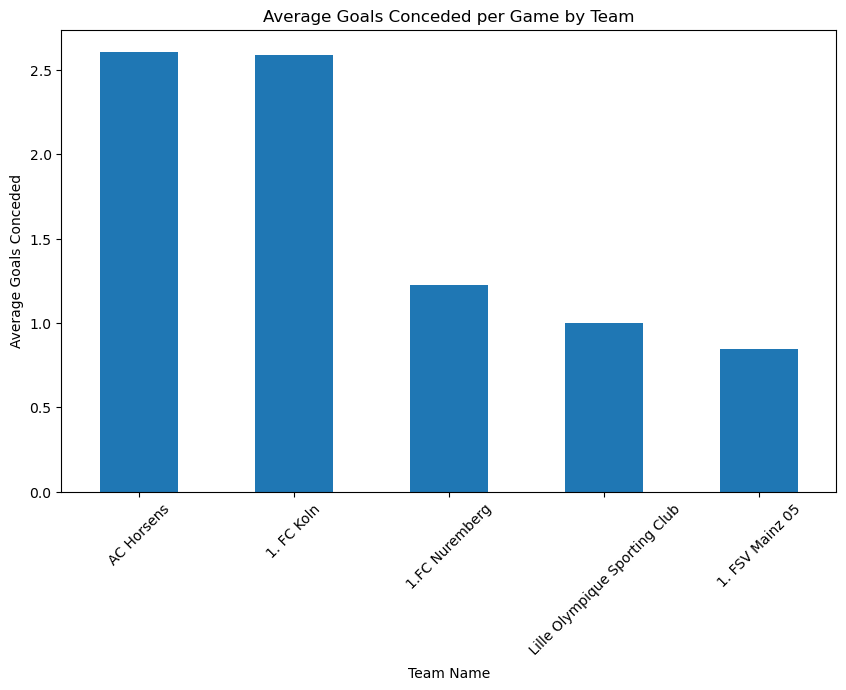

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average goals conceded per game for each team
team_avg_goals_conceded = df.groupby('home_club_name')['away_club_goals'].mean().head(5)

# Sort the teams by average goals conceded
team_avg_goals_conceded = team_avg_goals_conceded.sort_values(ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
team_avg_goals_conceded.plot(kind='bar')
plt.xlabel('Team Name')
plt.ylabel('Average Goals Conceded')
plt.title('Average Goals Conceded per Game by Team')
plt.xticks(rotation=45)
plt.show()

#### Interpretation: AC horsens has highest average goals conceded per game.

#### 4.What is the correlation between goals scored and attendance?

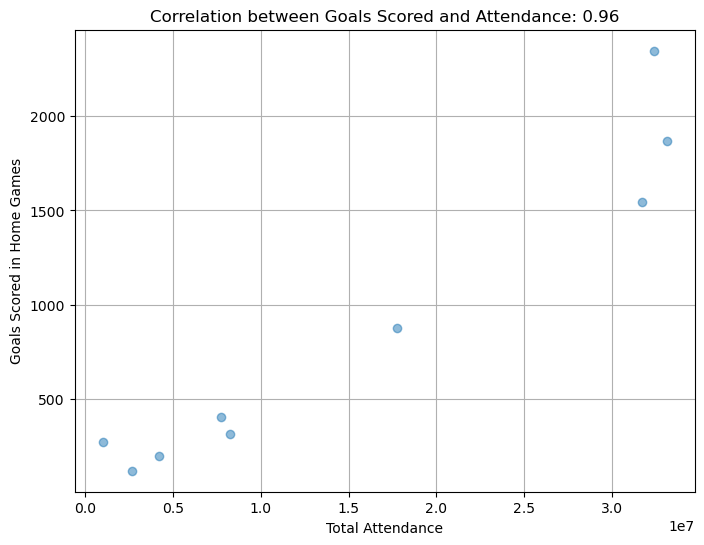

In [161]:
# Calculate total goals scored in home games and total attendance
attendance_goals = df.groupby('season').agg({
    'home_club_goals': 'sum',
    'attendance': 'sum'
}).reset_index()

# Calculate correlation
correlation = attendance_goals['home_club_goals'].corr(attendance_goals['attendance'])

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
plt.scatter(attendance_goals['attendance'], attendance_goals['home_club_goals'], alpha=0.5)
plt.title(f'Correlation between Goals Scored and Attendance: {correlation:.2f}')
plt.xlabel('Total Attendance')
plt.ylabel('Goals Scored in Home Games')
plt.grid()
plt.show()


#### Interpretation: The correlation is positive between goals scored and attendace.

### 5. How is the distribution of goals scored by different teams across all matches?

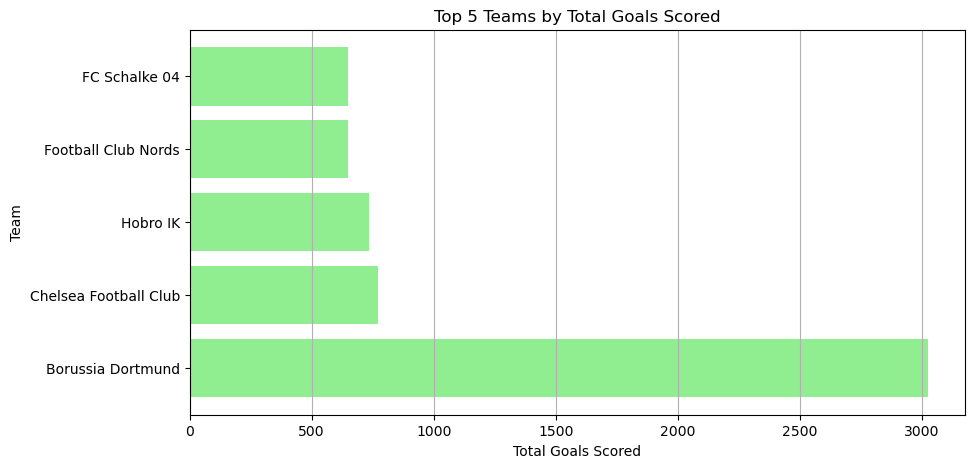

In [165]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate total goals scored for each team
# Goals scored can be calculated from both home and away matches
goals_scored_home = df.groupby('home_club_name')['home_club_goals'].sum().reset_index()
goals_scored_home.columns = ['Team', 'Total Goals']

goals_scored_away = df.groupby('away_club_name')['away_club_goals'].sum().reset_index()
goals_scored_away.columns = ['Team', 'Total Goals']

# Combine both DataFrames
total_goals_scored = pd.concat([goals_scored_home, goals_scored_away]).groupby('Team')['Total Goals'].sum().reset_index()

# Sort by Total Goals
total_goals_scored = total_goals_scored.sort_values(by='Total Goals', ascending=False)

# Select the top 5 teams with the highest total goals scored
top_5_teams = total_goals_scored.head(5)

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(top_5_teams['Team'], top_5_teams['Total Goals'], color='lightgreen')
plt.title('Top 5 Teams by Total Goals Scored')
plt.xlabel('Total Goals Scored')
plt.ylabel('Team')
plt.grid(axis='x')
plt.show()


#### Interpretation: Borussia dortmund team scored 3000 total goals which places them highest.

 ### 6.Which managers have the highest win rates based on match outcomes?

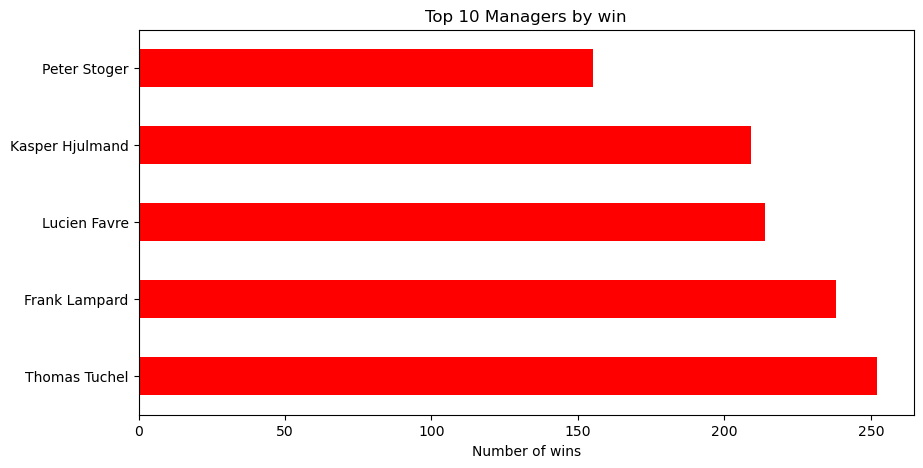

In [169]:
#Managers with highest win rates
df['home_win'] =  df['home_club_goals'] > df['away_club_goals']
df['away_win'] = df['away_club_goals'] > df['home_club_goals']

manager_wins =df.groupby('home_club_manager_name')['home_win'].sum() +\
              df.groupby('away_club_manager_name')['away_win'].sum()

top_managers = manager_wins.sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
top_managers.plot(kind='barh',color='red')
plt.title('Top 10 Managers by win')
plt.xlabel('Number of wins')
plt.show()

#### Interpretation: Thomas tuchel is the top manager with highest wins 

### Hypothesis testing

#### T-test

#### Question1: Is there a statistically significant difference in the average home club_goals and away club goals scored? Assuming that the goals are normally distributed and that the population variances are approximately equal. Using a 5% significance level to test this hypothesis.

H0:there is no significant difference in the average home_club_goals ansd away_club_goals  Mue=0
Ha:there is significant difference in the average home_club_goals ansd away_club_goals    Mue !=0
two sample two tailed hypothesis t_test is to be performed

In [177]:
import statistics as st
#Calculate the sample statistics for home club goals and away club goals using simple random sampling without replacement.
#sample 25 rows randomly from the merged data DataFrame
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
goal_sample_data = df.sample(n=25,random_state=1)

#extarct home and away goals from the sample data
home_sample =goal_sample_data['home_club_goals']
away_sample =goal_sample_data['away_club_goals']

x1=st.mean(home_sample)
x2=st.mean(away_sample)
sd1 = st.stdev(home_sample)
sd2 = st.stdev(away_sample)
v1=(st.stdev(home_sample))**2
v2=(st.stdev(away_sample))**2
n1=len(home_sample)
n2=len(away_sample)
df= n1+n2-2
print("Sample mean of  home_sample =",x1)
print("Sample mean of away_sample =",x2)
print("Sample SD  of home_sample=",sd1)
print("Sample SD  of away_sample=",sd2)
print("Sample variance of home_sample =",v1)
print("Sample variance of away_sample =",v2)
print("Sample size of home_sample =",n1)
print("Sample size of away_sample =",n2)
print('Degrees of freedom =',df)

Sample mean of  home_sample = 1.84
Sample mean of away_sample = 1.32
Sample SD  of home_sample= 1.312757911167681
Sample SD  of away_sample= 1.3140268896284681
Sample variance of home_sample = 1.7233333333333332
Sample variance of away_sample = 1.7266666666666663
Sample size of home_sample = 25
Sample size of away_sample = 25
Degrees of freedom = 48


In [179]:
from scipy.stats import t
import math

alpha=0.05 #significant level
#as this is the 2 tailed test,we have to consider alpha/2 i.e. 0.025.

#calculate teh test sattistic and p_value  for the hypothesis test

signal = abs(x1-x2)
noise = math.sqrt(v1*(n1-1) + v2*(n2-1))*math.sqrt(1/n1 + 1/n2)
t_statistic=signal/noise
print('t-statistic =',t_statistic)

p_value=t.sf(abs(t_statistic),df)*2
print("The p_value is = ", p_value)

t_critical = t.ppf(1-0.025, df)
print('t-critical =',t_critical)

t-statistic = 0.202042708452068
The p_value is =  0.840737220874958
t-critical = 2.010634757624232


### Establish the decision rule

As per decision rule:

p_value < alpha:rejection of null hypothesis

if -t_critical> t_statistic > +t_critical: rejection of null hypothesis

1.p_value = 0.84 > alpha=0.05, which leads to acceptance of null hypothesis

2.t_statistic =0.202<+t_critical=2.01,which leads to acceptance of null hypothesis

Interpreattion:we accept the null hypothesis there is no significant difefrence in the average in the average home_club_goals and away_club_goals scored and the hypothesis testing process identifies the same

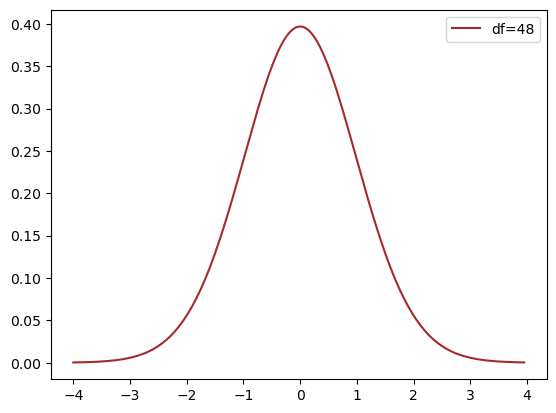

In [219]:
#plotting the t_distribution
x=np.arange(-4,4,0.05)
tvals48 = t.pdf(x,48)
plt.plot(x,tvals48,color='brown')
plt.legend(['df=48'])
plt.show()

### Z-static

#### Is there a statistically significant difference in the average number of yellow cards received by home teams compared to away teams? Assume that the yellow cards are normally distributed and that the population variances are approximately equal. Use a 5% significance level to test this hypothesis.

H0: There is no significant difference in the average number of yellow cards received by home teams and away teams.
Ha: There is a significant difference in the average number of yellow cards received by home teams and away teams.
The test needs to be conducted for the value which is greater than or less than the difference of population means. So, we have to perform the two-tailed test.

In [189]:
import statistics as st
from scipy.stats import norm
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
# Sample 1:
home_yellow_cards = df[df['home_club_name'].notnull()]['yellow_cards'] 
n1 = len(home_yellow_cards)
s_mean1 = st.mean(home_yellow_cards)
s_sd1 = st.stdev(home_yellow_cards)
s_var1 = s_sd1**2

print('home_yellow_cards:')
print('Mean =' + str(s_mean1))
print('Standard Deviation =' + str(s_sd1))
print('Sample Size =' + str(n1))
print('Variance =' + str(s_var1))

# Sample 2:
away_yellow_cards = df[df['away_club_name'].notnull()]['yellow_cards']
n2 = len(away_yellow_cards)
s_mean2 = st.mean(away_yellow_cards)
s_sd2 = st.stdev(away_yellow_cards)
s_var2 = s_sd2**2

print('\naway_yellow_cards:')
print('Mean =' + str(s_mean2))
print('Standard Deviation =' + str(s_sd2))
print('Sample Size =' + str(n2))
print('Variance =' + str(s_var2))

home_yellow_cards:
Mean =0.16003810431055013
Standard Deviation =0.36668505682186336
Sample Size =4199
Variance =0.13445793089645316

away_yellow_cards:
Mean =0.16003810431055013
Standard Deviation =0.36668505682186336
Sample Size =4199
Variance =0.13445793089645316


### Determine the appropriate statistical test

Home_yellow_cards 
Mean =0.16
Standard Deviation =0.36
Sample Size =4199
Variance =0.13

away_yellow_cards:
Mean =0.16
Standard Deviation =0.36
Sample Size =4199
Variance =0.13

We will test hypothesis about two sample test using the z-statistics.

 It is given that a 5% level of significance to be used to test hypothesis.

alpha (α) = 0.05

This test is a two-tailed test, each of the two rejection regions has an area of .025.

### Establish the decision rule

i. If p-value < α : Rejection of Null Hypothesis(H0)

ii. If -z-critical > z-statistic > +z-critical : Rejection of Null Hypothesis(H0)

### Analyze the data

In [197]:
alpha=0.05
z_statistics = ((s_mean1 - s_mean2)- 0) / (math.sqrt(s_var1/n1 + s_var2/n2)) 
print("The Z statistics is ", z_statistics)

p_value = norm.sf(abs(z_statistics))*2 #two tailed test
print("The p_value is "+str(p_value))

z_critical = norm.ppf(1 - alpha/2) # two tailed test
print("The z-critical value is "+str(z_critical))

The Z statistics is  0.0
The p_value is 1.0
The z-critical value is 1.959963984540054


p_value=1.0 > alpha=0.05, which leads to acceptance of Null Hypothesis.
z_statistics=0.0 < z-critical=1.9, which leads to acceptance of Null Hypothesis. 

#### Make a business decision

The business analyst accept the null hypothesis.There is no significant difference in the average number of yellow cards received by home teams and away teams.

### Construct a 95% confidence interval to estimate the difference in the mean between the two departments.

In [203]:
#The z-value for a 95% confidence interval is 1.96.
#(s_mean1 - s_mean2) - 1.96*(math.sqrt(s_var1/n1 + s_var2/n) <= µ1 - µ2 <= (s_mean1 - s_mean2) + 1.96*(math.sqrt(s_var1/n1 + s_var2/n)
lhs=(s_mean1 - s_mean2) - 1.96*(math.sqrt(s_var1/n1 + s_var2/n2))
print(lhs)
rhs=(s_mean1 - s_mean2) + 1.96*(math.sqrt(s_var1/n1 + s_var2/n2))
print(rhs)

-0.01568524634061602
0.01568524634061602


-0.01 <= (µ1 - µ2) <= 0.01

We are 95% confident that the actual difference in mean salaries between the two departments is between -0.01 and  0.01.

The point estimate is (s_mean1 - s_mean2) = -0.02

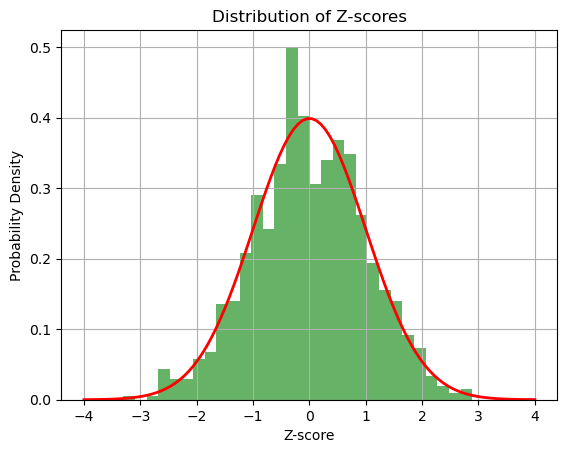

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data
df = np.random.randn(1000)

# Calculate Z-scores
z_scores = (df - df.mean()) / df.std()

# Create a histogram of the Z-scores
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='g')

# Plot the standard normal distribution (mean=0, std=1)
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), color='r', linewidth=2)

plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Distribution of Z-scores')
plt.grid(True)
plt.show()

#### Interpretation:Bell-Shaped Distribution: The shape of the histogram closely resembles the bell curve of the standard normal distribution. This suggests that the data from which these Z-scores were derived is approximately normally distributed.Symmetry: The distribution appears to be roughly symmetrical around the mean (which is 0 for Z-scores). This indicates that the data points are evenly distributed on both sides of the mean.Central Tendency: Most of the Z-scores fall within the central region of the distribution, with fewer scores observed in the tails. This is characteristic of a normal distribution, where the majority of data points cluster around the mean.